599


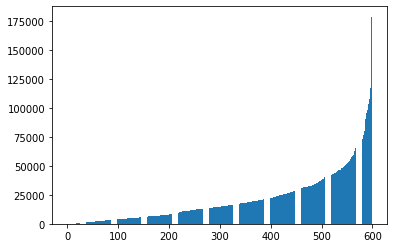

In [8]:
import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)
# 아침 7시 승차 인원 출력
result = []
for row in data :
    row[4:] = map(int, row[4:]) # 모두 정수로 변환
    result.append(row[10]) # 7시 인덱스는 10
print(len(result))
# print(result)

import matplotlib.pyplot as plt
result.sort() # 정렬 후 그리기
plt.bar(range(len(result)), result)
plt.show()

599


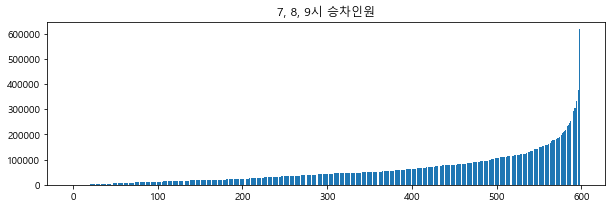

In [10]:
# 아침 7~9시 승차인원 더하기

import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)
# 아침 7시 승차 인원 출력
result = []
for row in data :
    row[4:] = map(int, row[4:]) # 모두 정수로 변환
    result.append(sum(row[10:15:2])) # 7시 인덱스는 10, 짝수가 승차인원
# print(len(result))
# print(result)

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 3))
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('7, 8, 9시 승차인원')
result.sort() # 정렬 후 그리기
plt.bar(range(len(result)), result)
plt.show()

In [11]:
# 아침 7~9 시 승차인원 최대 역 찾기
import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''
tmp = 0
result = []

for row in data :
    row[4:] = map(int, row[4:]) # 모두 정수로 변환
    tmp = sum(row[10:15:2])
    if(tmp > mx) :
        mx = tmp
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, format(mx, '3,d'), '명')

신림(2호선) 615,935 명


In [17]:
# 아침 7~9 승하차 최대 인원 역

import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)

on_mx = 0 # 승차인원
off_mx = 0 # 하차인원
on_mx_station = '' # 승차 max 역
off_mx_station = '' # 하차 max 역
tmp = 0

for row in data :
    row[4:] = map(int, row[4:]) # 모두 정수로 변환
    
    # 승차
    tmp = sum(row[10:15:2])
    if(tmp > on_mx) :
        on_mx = tmp
        on_mx_station = row[3] + '(' + row[1] + ')'
        
    # 하차
    tmp = sum(row[11:16:2]) # 홀수 column이 하차인원
    if tmp > off_mx :
        off_mx = tmp
        off_mx_station = row[3] + '(' + row[1] + ')'
print('최대 승차인원 : ', on_mx_station, format(on_mx, '3,d'), '명')
print('최대 하차인원 : ', off_mx_station, format(off_mx, '3,d'), '명')

최대 승차인원 :  신림(2호선) 615,935 명
최대 하차인원 :  강남(2호선) 726,552 명


In [20]:
# 특정 시간에 사람들이 가장 많이 타는 역
# 승차시간 : 4시(idx: 4), 5시(idx:6), 6시(idx:8)

import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)

on_mx = 0
off_mx = 0
on_mx_station = ''
off_mx_station = ''
tmp = 0

t = int(input('시간 : '))
tIdx = 4 + (t - 4) * 2 # 그 시간의 승차 인원 idx

for row in data : 
    row[4:] = map(int, row[4:])
    
    tmp = row[tIdx] # 승차
    if(tmp > on_mx) :
        on_mx = tmp
        on_mx_station = row[3] + '(' + row[1] + ')'
    
    tmp = row[tIdx+1] # 하차
    if(tmp > off_mx) :
        off_mx = tmp
        off_mx_station = row[3] + '(' + row[1] + ')'
print(t, '시 최대 승차 : ' , on_mx_station, format(on_mx, '3,d'), '명')
print(t, '시 최대 하차 : ' , off_mx_station, format(off_mx, '3,d'), '명')

시간 : 11
11 시 최대 승차 :  신림(2호선) 65,476 명
11 시 최대 하차 :  강남(2호선) 94,942 명


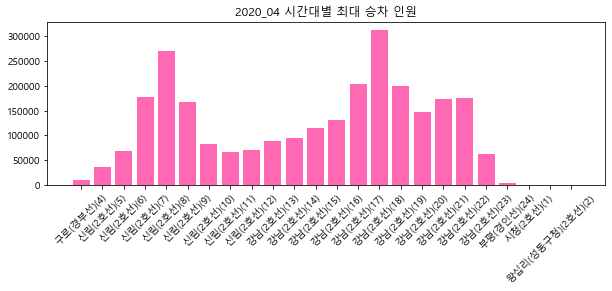

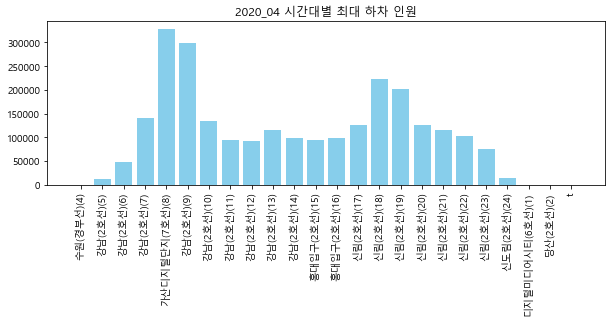

In [38]:
# 시간대 별 최대 승/하차 인원 역(새벽 4시 - 새벽3시)
import csv
f = open('2020_04_subwayTime.csv')
data = csv.reader(f)
next(data)
next(data)

on_mx = [0] * 24 # 시간
on_mx_station = [''] * 24
off_mx = [0] * 24
off_mx_station = ['t'] * 24
tmp = 0

for row in data :
    row[4:] = map(int, row[4:])
    for j in range(24):
        tmp = int(str(j + 4))
        if(tmp > 24) :
            tmp = tmp - 24
            
        a = row[j*2+4]
        if a > on_mx[j] :
            on_mx[j] = a
            on_mx_station[j] = row[3] + '(' + row[1] + ')' + '(' + str(tmp) + ')' # 역, 시간
        
        a = row[j*2+4+1] 
        if a > off_mx[j] :
            off_mx[j] = a
            off_mx_station[j] = row[3] + '(' + row[1] + ')' + '(' + str(tmp) + ')'


import matplotlib.pyplot as plt
# 승차
plt.figure(figsize = (10, 3))
plt.rc('font', family = 'Malgun Gothic')
plt.title('2020_04 시간대별 최대 승차 인원')

plt.bar(range(24), on_mx, color = 'hotpink', label = '승차')
plt.xticks(range(24), on_mx_station, rotation = 45)
plt.savefig('./images/' + '시간대별 최대 승차인원' + '.png', bbox_inches='tight')

# 하차
plt.figure(figsize = (10, 3))
plt.rc('font', family = 'Malgun Gothic')
plt.title('2020_04 시간대별 최대 하차 인원')

plt.bar(range(24), off_mx, color = 'skyblue', label = '하차')
plt.xticks(range(24), off_mx_station, rotation = 90)
plt.savefig('./images/' + '시간대별 최대 하차인원' + '.png', bbox_inches='tight')
plt.show()